In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from fancyimpute import IterativeImputer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
loan = pd.read_csv("bank-additional-full.csv",sep=';')

In [263]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [264]:
loan=loan.reset_index()

In [265]:
loan.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [266]:
loan=loan.rename(columns={'index': 'pr_id'})
loan=loan.set_index('pr_id')
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [267]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Check Missing values

In [268]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Check the column Names

In [269]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Check the values of the response variable

In [270]:
loan['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

### Convert "No"s to 0 and "Yes"es to 1

In [271]:
loan.loc[loan['y']=='no','y']=0
loan.loc[loan['y']=='yes','y']=1

### Again check the value of the response variable

In [272]:
loan['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

### Check for the unknown Values

In [273]:
def check_unknown_per(df):
    cols=df.columns
    ind=len(df.index)
    colm=[]
    percnt=[]
    Null=[]
    tot=[]
    for col in cols:
        colm.append(col)
        null=df.loc[df[col]=='unknown'][col].count()
        Null.append(null)
        tot.append(ind)
        per=null*100/ind
        percnt.append(per)
    colm=pd.Series(colm)
    percnt=pd.Series(percnt)
    Null=pd.Series(Null)
    total=pd.Series(tot)
    missing_val=pd.concat([colm, Null,total,percnt], axis=1, keys=['Column', 'Null Values','Total Values','Percent of NULL Values']).sort_values(by='Percent of NULL Values',ascending=False)#.set_index(keys='Column',inplace=True)
    missing_val.set_index('Column')
    return(missing_val[missing_val['Percent of NULL Values']>0])

In [274]:
missing_val=check_unknown_per(loan)
missing_val

,Column,Null Values,Total Values,Percent of NULL Values
4,default,8597,41188,20.872584
3,education,1731,41188,4.202680
5,housing,990,41188,2.403613
6,loan,990,41188,2.403613
1,job,330,41188,0.801204
2,marital,80,41188,0.194231


#### We can see that default is the column having maximum number of "Unlnown" values
#### Since it's a variable which is very important, and we can neither update the "unknown" to "default" or "non-default" at the same time, since it's 20% of the dataset, so we cannot remove these either
#### So let's keep unknown as a seperate category in "default" columns

#### Similarly looking to other columns with unknown values, we can say than for none of them can be manipulated with any other value as as changing them to other values may distort the meaning of the values for that column, as all of these may effect the response of the customer
#### "marital" is the column, for which unknown can be converted. let's see the distribution of values among different categories for this variable

In [275]:
loan.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

#### Let's manipulte the "unknown" to largest class that is "married"

In [276]:
loan.loc[loan['marital']=='unknown','marital']='married'
loan.marital.value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

### EDA on Age column

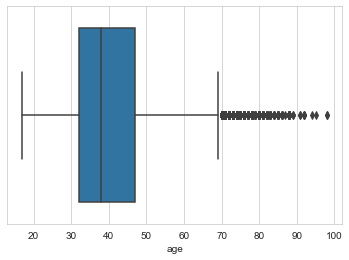

In [277]:
sns.boxplot(x='age',data=loan)

#### Let's see the percentile of the values for age column

In [278]:
loan['age'].describe(percentiles=[0.10,0.25,0.50,0.75,0.90,0.95,0.99])

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
10%         28.00000
25%         32.00000
50%         38.00000
75%         47.00000
90%         55.00000
95%         58.00000
99%         71.00000
max         98.00000
Name: age, dtype: float64

### We can see the 99th percentile of age is 71 years, i.e 1% outliers are above the age pf 71, now let's also see how many are these

In [279]:
loan[loan.age>=71].age.count()/len(loan)*100

1.0245702631834515

### We can see that there are 1% such values, so let's cap them and plot a box plot again

In [280]:
loan.loc[loan['age']>=71,'age']=71

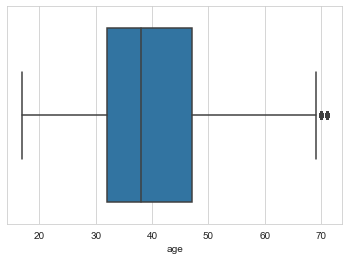

In [281]:
sns.boxplot(x='age',data=loan)

### Create the bins with step size 10 starting for 10 years of age to max+10 of the age

In [282]:
bins=np.arange(10,loan['age'].max()+10,10)
print(bins)

[10 20 30 40 50 60 70 80]


### Create a age_bin column in Loan dataframe by using the above bin

In [283]:
loan['age_bins']=pd.cut(loan['age'],bins,include_lowest=True)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bins
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


### Create a dataframe having number of counts for each age_bin

In [284]:
No_of_prospects=loan.groupby('age_bins')['y'].count().reset_index(name='No_of_prospects')
No_of_prospects

,age_bins,No_of_prospects
0,"(9.999, 20.0]",140
1,"(20.0, 30.0]",7243
2,"(30.0, 40.0]",16385
3,"(40.0, 50.0]",10240
4,"(50.0, 60.0]",6270
5,"(60.0, 70.0]",488
6,"(70.0, 80.0]",422


### Creating a dataframe having number of positive response for each age_bin

In [285]:
count_prospect=loan[loan['y']==1].groupby('age_bins')['y'].count().reset_index(name='count_prospect')
count_prospect

,age_bins,count_prospect
0,"(9.999, 20.0]",57
1,"(20.0, 30.0]",1067
2,"(30.0, 40.0]",1597
3,"(40.0, 50.0]",837
4,"(50.0, 60.0]",668
5,"(60.0, 70.0]",212
6,"(70.0, 80.0]",202


### Merge the above 2 dataframes

In [286]:
agg_age=No_of_prospects.merge(count_prospect,on='age_bins')
agg_age

,age_bins,No_of_prospects,count_prospect
0,"(9.999, 20.0]",140,57
1,"(20.0, 30.0]",7243,1067
2,"(30.0, 40.0]",16385,1597
3,"(40.0, 50.0]",10240,837
4,"(50.0, 60.0]",6270,668
5,"(60.0, 70.0]",488,212
6,"(70.0, 80.0]",422,202


### Add one more column to calculate the % of the conversion for each age_bin

In [287]:
agg_age['response_rate']=(agg_age['count_prospect']/agg_age['No_of_prospects']*100).round(1)
agg_age

,age_bins,No_of_prospects,count_prospect,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


[Text(0, 0, '(9.999, 20.0]'),
 Text(0, 0, '(20.0, 30.0]'),
 Text(0, 0, '(30.0, 40.0]'),
 Text(0, 0, '(40.0, 50.0]'),
 Text(0, 0, '(50.0, 60.0]'),
 Text(0, 0, '(60.0, 70.0]'),
 Text(0, 0, '(70.0, 80.0]')]

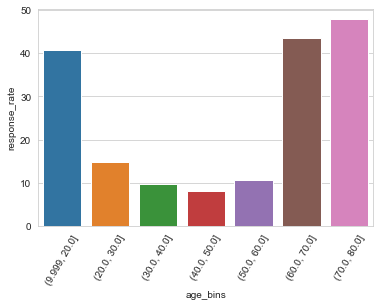

In [288]:
ax= sns.barplot(x='age_bins',y='response_rate',data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

#### From the above barplot we can see the response rate is maximum for the people 60+ years of age less than 20 years of age
#### Which points out that the retiered people. or youngest people(probably Students, for which theri parents are investing for them), are more likely to invest inthe scheme
#### This is because for retired people, there are less libalties, and for younger ones, parents are investing for their future

### EDA on Marital 

In [289]:
no_of_prospects_marital= loan.groupby('marital')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_marital

,marital,no_of_prospects
0,divorced,4612
1,married,25008
2,single,11568


In [290]:
count_prospects_marital=loan[loan['y']==1].groupby('marital')['y'].count().reset_index(name='count_prospect')
count_prospects_marital

,marital,count_prospect
0,divorced,476
1,married,2544
2,single,1620


In [291]:
agg_marital=count_prospects_marital.merge(no_of_prospects_marital,on='marital')
agg_marital

,marital,count_prospect,no_of_prospects
0,divorced,476,4612
1,married,2544,25008
2,single,1620,11568


In [292]:
agg_marital['response_rate']=(100*agg_marital['count_prospect']/agg_marital['no_of_prospects']).round(2)

In [293]:
agg_marital

,marital,count_prospect,no_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


[Text(0, 0, 'divorced'), Text(0, 0, 'married'), Text(0, 0, 'single')]

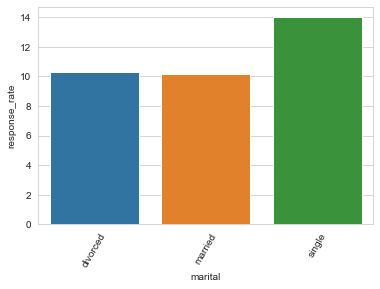

In [294]:
ax=sns.barplot(x='marital',y='response_rate',data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

#### Response rate for Singles is a bit high probably, bcaause they are in their early phase of their career and don't have much libalties, and can spare some part of their income into investment and savings

### EDA for Education

In [295]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

### Let's merge basic.9y,basic.6y,basic.4y and illitrate  into a single category as "Primary_Education"
### Let's also conver high.school to secondary and university.degree to Tirtiary 

In [296]:
loan.replace({'education':{'basic.9y':'Primary_Education','basic.6y':'Primary_Education','basic.4y':'Primary_Education',
                          'illiterate':'Primary_Education','high.school':'Secondary','university.degree':'Tirtary'}},inplace =True)

### Get the conversion rate for each Education type same as we done for age column

In [297]:
no_of_prospects_education= loan.groupby('education')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_education

,education,no_of_prospects
0,Primary_Education,12531
1,Secondary,9515
2,Tirtary,12168
3,professional.course,5243
4,unknown,1731


In [298]:
count_prospects_education=loan[loan['y']==1].groupby('education')['y'].count().reset_index(name='count_prospect')
count_prospects_education

,education,count_prospect
0,Primary_Education,1093
1,Secondary,1031
2,Tirtary,1670
3,professional.course,595
4,unknown,251


In [299]:
agg_education=count_prospects_education.merge(no_of_prospects_education,on='education')
agg_education

,education,count_prospect,no_of_prospects
0,Primary_Education,1093,12531
1,Secondary,1031,9515
2,Tirtary,1670,12168
3,professional.course,595,5243
4,unknown,251,1731


In [300]:
agg_education['response_rate']=(100*agg_education['count_prospect']/agg_education['no_of_prospects']).round(2)

In [301]:
agg_education

,education,count_prospect,no_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary,1031,9515,10.84
2,Tirtary,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


[Text(0, 0, 'Primary_Education'),
 Text(0, 0, 'Secondary'),
 Text(0, 0, 'Tirtary'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown')]

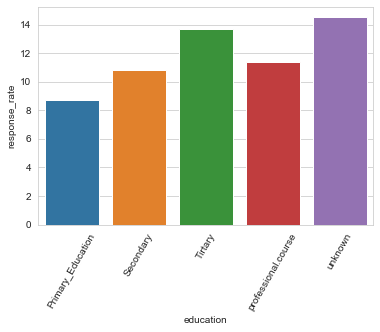

In [302]:
ax=sns.barplot(x='education',y='response_rate',data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

#### From above barplot we can guess that as the education level increases,the trend in into investment increases, whereas for people with professional course, it decreases
#### The reason behind that may be with increase in education level income also may increase,hence trend towards investment increases too
#### On the other hand people with professional degree, probably are less interesed, as they may be preferring to invest into some high return but risky instruments,rtaher than going for term deposit, because of their professional knowledge
#### But the diffence in percentage is not significant

### EDA for Previous_default

In [303]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

### Get the conversion rate for each default type 

In [304]:
no_of_prospects_default= loan.groupby('default')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_default

,default,no_of_prospects
0,no,32588
1,unknown,8597
2,yes,3


In [305]:
count_prospects_default=loan[loan['y']==1].groupby('default')['y'].count().reset_index(name='count_prospect')
temp=pd.DataFrame({'default':['yes'],'count_prospect':[0]})
count_prospects_default=pd.concat([count_prospects_default,temp]).reset_index(drop=True)
count_prospects_default

,default,count_prospect
0,no,4197
1,unknown,443
2,yes,0


In [306]:
agg_default=count_prospects_default.merge(no_of_prospects_default,on='default')
agg_default

,default,count_prospect,no_of_prospects
0,no,4197,32588
1,unknown,443,8597
2,yes,0,3


In [307]:
agg_default['response_rate']=(100*agg_default['count_prospect']/agg_default['no_of_prospects']).round(2)

In [308]:
agg_default

,default,count_prospect,no_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


[Text(0, 0, 'no'), Text(0, 0, 'unknown'), Text(0, 0, 'yes')]

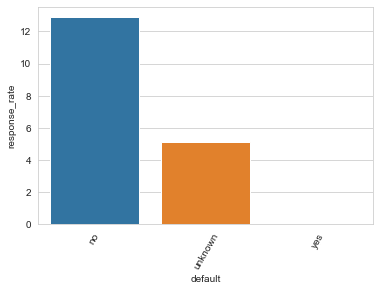

In [309]:
ax=sns.barplot(x='default',y='response_rate',data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

#### From the abovebar plot it's clear that the bank even didn't tried to connect to the customer, who have ever defaulted 

### EDA on Housing

In [310]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

### Get the conversion rate for each default type Housing Loan type

In [311]:
no_of_prospects_housing= loan.groupby('housing')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_housing

,housing,no_of_prospects
0,no,18622
1,unknown,990
2,yes,21576


In [312]:
count_prospects_housing=loan[loan['y']==1].groupby('housing')['y'].count().reset_index(name='count_prospect')
count_prospects_housing

,housing,count_prospect
0,no,2026
1,unknown,107
2,yes,2507


In [313]:
agg_housing=count_prospects_housing.merge(no_of_prospects_housing,on='housing')
agg_housing

,housing,count_prospect,no_of_prospects
0,no,2026,18622
1,unknown,107,990
2,yes,2507,21576


In [315]:
agg_housing['response_rate']=(100*agg_housing['count_prospect']/agg_housing['no_of_prospects']).round(2)

In [316]:
agg_housing

,housing,count_prospect,no_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


[Text(0, 0, 'no'), Text(0, 0, 'unknown'), Text(0, 0, 'yes')]

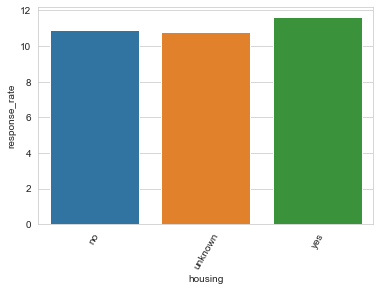

In [317]:
ax=sns.barplot(x='housing',y='response_rate',data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

#### There is not much difference between the one's having the housing loan vs others

### EDA on loan

In [318]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

### Get the conversion rate for each loan type 

In [319]:
no_of_prospects_loan= loan.groupby('loan')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_loan

,loan,no_of_prospects
0,no,33950
1,unknown,990
2,yes,6248


In [320]:
count_prospects_loan=loan[loan['y']==1].groupby('loan')['y'].count().reset_index(name='count_prospect')
count_prospects_loan

,loan,count_prospect
0,no,3850
1,unknown,107
2,yes,683


In [321]:
agg_loan=count_prospects_loan.merge(no_of_prospects_loan,on='loan')
agg_loan

,loan,count_prospect,no_of_prospects
0,no,3850,33950
1,unknown,107,990
2,yes,683,6248


In [322]:
agg_loan['response_rate']=(100*agg_loan['count_prospect']/agg_loan['no_of_prospects']).round(2)

In [323]:
agg_loan

,loan,count_prospect,no_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


[Text(0, 0, 'no'), Text(0, 0, 'unknown'), Text(0, 0, 'yes')]

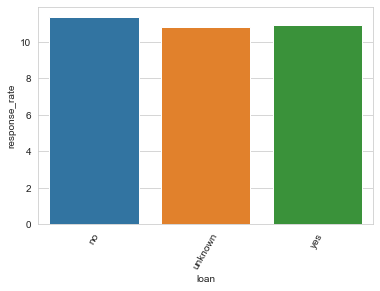

In [324]:
ax=sns.barplot(x='loan',y='response_rate',data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

### EDA on Contact(Contact done on cell phone or land-line)

In [325]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

### Get the conversion rate for each contact type 

In [326]:
no_of_prospects_contact= loan.groupby('contact')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_contact

,contact,no_of_prospects
0,cellular,26144
1,telephone,15044


In [327]:
count_prospects_contact=loan[loan['y']==1].groupby('contact')['y'].count().reset_index(name='count_prospect')
count_prospects_contact

,contact,count_prospect
0,cellular,3853
1,telephone,787


In [328]:
agg_contact=count_prospects_contact.merge(no_of_prospects_contact,on='contact')
agg_contact

,contact,count_prospect,no_of_prospects
0,cellular,3853,26144
1,telephone,787,15044


In [329]:
agg_contact['response_rate']=(100*agg_contact['count_prospect']/agg_contact['no_of_prospects']).round(2)

In [330]:
agg_contact

,contact,count_prospect,no_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


[Text(0, 0, 'cellular'), Text(0, 0, 'telephone')]

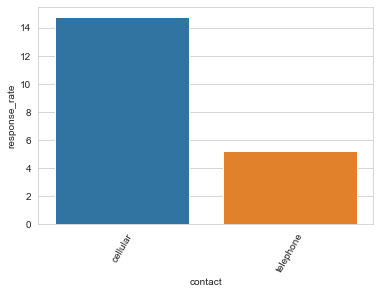

In [331]:
ax=sns.barplot(x='contact',y='response_rate',data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

### EDA on month(month when the Last contact was made with customer)

In [332]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

### Get the conversion rate for each contact type 

In [333]:
no_of_prospects_month= loan.groupby('month')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_month

,month,no_of_prospects
0,apr,2632
1,aug,6178
2,dec,182
3,jul,7174
4,jun,5318
5,mar,546
6,may,13769
7,nov,4101
8,oct,718
9,sep,570


In [334]:
count_prospects_month=loan[loan['y']==1].groupby('month')['y'].count().reset_index(name='count_prospect')
count_prospects_month

,month,count_prospect
0,apr,539
1,aug,655
2,dec,89
3,jul,649
4,jun,559
5,mar,276
6,may,886
7,nov,416
8,oct,315
9,sep,256


In [335]:
agg_month=count_prospects_month.merge(no_of_prospects_month,on='month')
agg_month

,month,count_prospect,no_of_prospects
0,apr,539,2632
1,aug,655,6178
2,dec,89,182
3,jul,649,7174
4,jun,559,5318
5,mar,276,546
6,may,886,13769
7,nov,416,4101
8,oct,315,718
9,sep,256,570


In [336]:
agg_month['response_rate']=(100*agg_month['count_prospect']/agg_month['no_of_prospects']).round(2)

In [337]:
agg_month

,month,count_prospect,no_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


[Text(0, 0, 'apr'),
 Text(0, 0, 'aug'),
 Text(0, 0, 'dec'),
 Text(0, 0, 'jul'),
 Text(0, 0, 'jun'),
 Text(0, 0, 'mar'),
 Text(0, 0, 'may'),
 Text(0, 0, 'nov'),
 Text(0, 0, 'oct'),
 Text(0, 0, 'sep')]

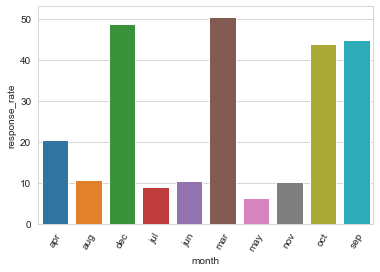

In [338]:
ax=sns.barplot(x='month',y='response_rate',data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

### EDA for day_of_week

In [339]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

### Get the conversion rate for each day_of_week type 

In [340]:
no_of_prospects_day_of_week= loan.groupby('day_of_week')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_day_of_week

,day_of_week,no_of_prospects
0,fri,7827
1,mon,8514
2,thu,8623
3,tue,8090
4,wed,8134


In [341]:
count_prospects_day_of_week=loan[loan['y']==1].groupby('day_of_week')['y'].count().reset_index(name='count_prospect')
count_prospects_day_of_week

,day_of_week,count_prospect
0,fri,846
1,mon,847
2,thu,1045
3,tue,953
4,wed,949


In [342]:
agg_day_of_week=count_prospects_day_of_week.merge(no_of_prospects_day_of_week,on='day_of_week')
agg_day_of_week

,day_of_week,count_prospect,no_of_prospects
0,fri,846,7827
1,mon,847,8514
2,thu,1045,8623
3,tue,953,8090
4,wed,949,8134


In [343]:
agg_day_of_week['response_rate']=(100*agg_day_of_week['count_prospect']/agg_day_of_week['no_of_prospects']).round(2)

In [344]:
agg_day_of_week

,day_of_week,count_prospect,no_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


[Text(0, 0, 'fri'),
 Text(0, 0, 'mon'),
 Text(0, 0, 'thu'),
 Text(0, 0, 'tue'),
 Text(0, 0, 'wed')]

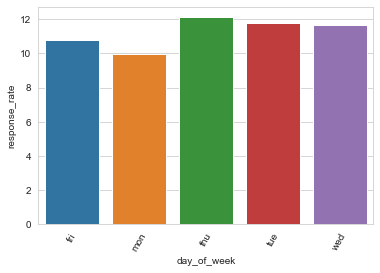

In [345]:
ax=sns.barplot(x='day_of_week',y='response_rate',data=agg_day_of_week)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

### EDA for the duration

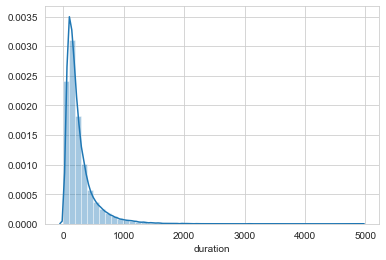

In [346]:
sns.distplot(loan['duration'])

In [347]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

### Check for outliers using boxplot

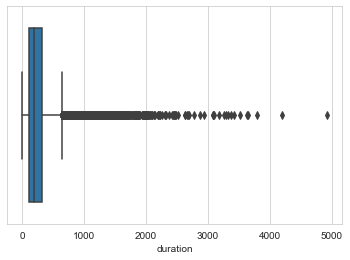

In [348]:
sns.boxplot(loan['duration'])

In [349]:
loan['duration'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
90%        551.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

### From above box-plot we can see there are number of outliers,let's cap these with 99th percentile value

In [350]:
loan.loc[loan['duration']>=1271,'duration']=1271

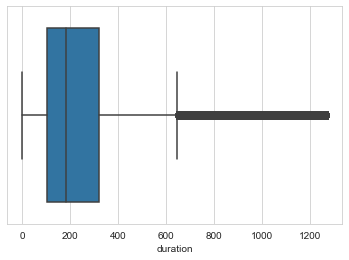

In [351]:
sns.boxplot(loan['duration'])

### Let's plot the distplot again for duration

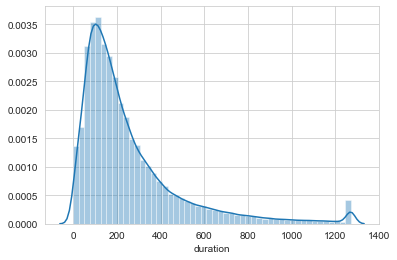

In [352]:
sns.distplot(loan['duration'])

### Now let's do the EDA on the data that bank collected for the previous campaigns
- Campaign -Number of contatcts made to this customer durng this campaign -
- Pdays -Number of deys passed by after the client was last contacted from the previous campaign
- Previous -Number of times the customer was contacted before this campaign
- Poutcome -Outcome of the previous marketting campaign

### Campaign

In [353]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

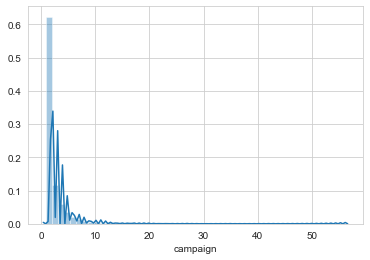

In [354]:
sns.distplot(loan['campaign'])

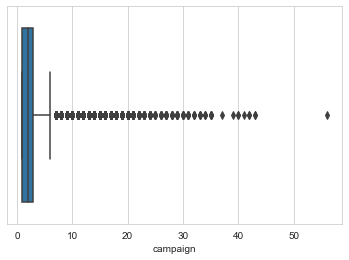

In [355]:
sns.boxplot(loan['campaign'])

In [356]:
loan['campaign'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

### From above box-plot we can see there are number of outliers,let's cap these with 99th percentile value

In [357]:
loan.loc[loan['campaign']>=14,'campaign']=14

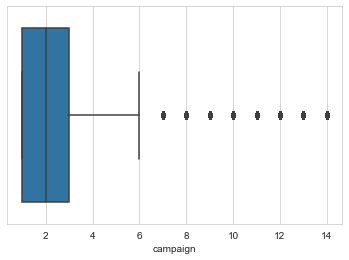

In [358]:
sns.boxplot(loan['campaign'])

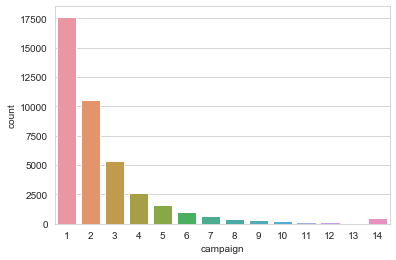

In [359]:
sns.countplot(loan['campaign'])

### Get the conversion rate for each count of the campaign 

In [360]:
no_of_prospects_campaign = loan.groupby('campaign')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_campaign

,campaign,no_of_prospects
0,1,17642
1,2,10570
2,3,5341
3,4,2651
4,5,1599
5,6,979
6,7,629
7,8,400
8,9,283
9,10,225


In [361]:
count_campaign=loan[loan['y']==1].groupby('campaign')['y'].count().reset_index(name='count_prospect')
count_campaign

,campaign,count_prospect
0,1,2300
1,2,1211
2,3,574
3,4,249
4,5,120
5,6,75
6,7,38
7,8,17
8,9,17
9,10,12


In [362]:
agg_campaign=count_campaign.merge(no_of_prospects_campaign,on='campaign')
agg_campaign

,campaign,count_prospect,no_of_prospects
0,1,2300,17642
1,2,1211,10570
2,3,574,5341
3,4,249,2651
4,5,120,1599
5,6,75,979
6,7,38,629
7,8,17,400
8,9,17,283
9,10,12,225


In [363]:
agg_campaign['response_rate']=(100*agg_campaign['count_prospect']/agg_campaign['no_of_prospects']).round(2)

In [364]:
agg_campaign

,campaign,count_prospect,no_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14')]

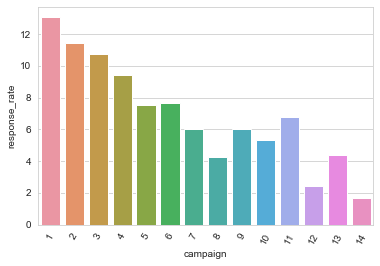

In [365]:
ax=sns.barplot(x='campaign',y='response_rate',data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

### Interesting thing to note that the converson rate reduces as the number of contacts made in previous campaigns increase. This may be impying that some customers may have prejudice and the wrong perception about the bank and hence didn't response postively

### EDA on pdays column

In [366]:
loan.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

### Let'simpute these values into three categories 
- Contact made in last 10 days
- Contact made before 10 days
- First time contact

In [367]:
loan.loc[loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10]),'pdays']='Contacted_in_last_10_Days'
loan.loc[loan['pdays']==999,'pdays']='First_Time_Contacted'
loan.loc[~loan['pdays'].isin(['Contacted_in_last_10_Days','First_Time_Contacted']),'pdays']='Contact_made_before_10_Days'

In [368]:
loan.pdays.value_counts()

First_Time_Contacted           39673
Contacted_in_last_10_Days       1311
Contact_made_before_10_Days      204
Name: pdays, dtype: int64

In [369]:
no_of_prospects_pdays=loan.groupby('pdays')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_pdays

,pdays,no_of_prospects
0,Contact_made_before_10_Days,204
1,Contacted_in_last_10_Days,1311
2,First_Time_Contacted,39673


In [370]:
count_prospects_pdays=loan[loan['y']==1].groupby('pdays')['y'].count().reset_index(name='count_prospects')
count_prospects_pdays

,pdays,count_prospects
0,Contact_made_before_10_Days,116
1,Contacted_in_last_10_Days,851
2,First_Time_Contacted,3673


In [371]:
agg_pdays=no_of_prospects_pdays.merge(count_prospects_pdays,on='pdays')
agg_pdays['response_rate']=(100*agg_pdays['count_prospects']/agg_pdays['no_of_prospects']).round(2)
agg_pdays

,pdays,no_of_prospects,count_prospects,response_rate
0,Contact_made_before_10_Days,204,116,56.86
1,Contacted_in_last_10_Days,1311,851,64.91
2,First_Time_Contacted,39673,3673,9.26


[Text(0, 0, 'Contact_made_before_10_Days'),
 Text(0, 0, 'Contacted_in_last_10_Days'),
 Text(0, 0, 'First_Time_Contacted')]

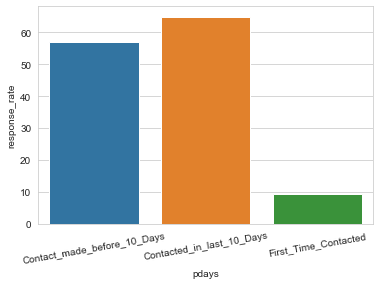

In [372]:
ax= sns.barplot(x='pdays',y='response_rate',data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)

#### From the above bar plot we can see the conversion rate is lowest for the people who were just contacted once

### EDA on previous

In [373]:
loan.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

### Let's convert the valuse corresponding to previous column into 3 categories
- 0 - 'Never_contacted'
- [1-3] - 'Less_than_3_times'
- [>3] - 'More than 3 times'

In [374]:
loan.loc[loan['previous']==0,'previous']='Never_contacted'
loan.loc[loan['previous'].isin([1,2,3]),'previous']='Less_than_3_times'
loan.loc[loan['previous'].isin([4,5,6,7]),'previous']='More than 3 times'

In [375]:
loan.previous.value_counts()

Never_contacted      35563
Less_than_3_times     5531
More than 3 times       94
Name: previous, dtype: int64

In [376]:
no_of_prospects_previous=loan.groupby('previous')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_previous

,previous,no_of_prospects
0,Less_than_3_times,5531
1,More than 3 times,94
2,Never_contacted,35563


In [377]:
count_prospects_previous=loan[loan['y']==1].groupby('previous')['y'].count().reset_index(name='count_prospects')
count_prospects_previous

,previous,count_prospects
0,Less_than_3_times,1445
1,More than 3 times,54
2,Never_contacted,3141


In [378]:
agg_previous=no_of_prospects_previous.merge(count_prospects_previous,on='previous')
agg_previous['response_rate']=(100*agg_previous['count_prospects']/agg_previous['no_of_prospects']).round(2)
agg_previous

,previous,no_of_prospects,count_prospects,response_rate
0,Less_than_3_times,5531,1445,26.13
1,More than 3 times,94,54,57.45
2,Never_contacted,35563,3141,8.83


[Text(0, 0, 'Less_than_3_times'),
 Text(0, 0, 'More than 3 times'),
 Text(0, 0, 'Never_contacted')]

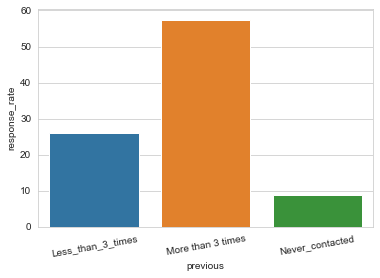

In [379]:
ax= sns.barplot(x='previous',y='response_rate',data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)

#### From above bar plot we can see that the persons who have contacted more than 3 times have highest conversion rates

### Now let's analyse the microeconomical variables, which will give us the himt ofthe market condition when this campaign was in progress
- emp.var.rate - Employee Variation Rate - Quartarly Indicator (Number of employees hired againsed the number of employees fired)
- cons.price.index - Consimer Price Index- Monthly Indicator
- cons.conf.indx - Consumer Confidence Index - Monthly Indicator
- eurobor3m - Euroborn 3 Month Rate - Daily Indicator (Interest a bank charges to other bank on the amount it lend)
- nr.employeed - Number of employees - QuaterlyIndicator

### EDA on emp.var.rate

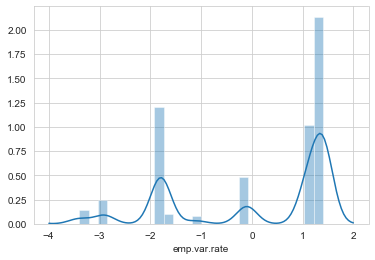

In [380]:
sns.distplot(loan['emp.var.rate'])

In [381]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [382]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [383]:
no_of_prospects_emp_var_rate=loan.groupby('emp.var.rate')['y'].count().reset_index(name='no_of_prospects')
no_of_prospects_emp_var_rate

,emp.var.rate,no_of_prospects
0,-3.4,1071
1,-3.0,172
2,-2.9,1663
3,-1.8,9184
4,-1.7,773
5,-1.1,635
6,-0.2,10
7,-0.1,3683
8,1.1,7763
9,1.4,16234


In [384]:
count_prospects_emp_var_rate=loan[loan['y']==1].groupby('emp.var.rate')['y'].count().reset_index(name='count_prospects')
count_prospects_emp_var_rate

,emp.var.rate,count_prospects
0,-3.4,454
1,-3.0,88
2,-2.9,594
3,-1.8,1461
4,-1.7,403
5,-1.1,301
6,-0.2,1
7,-0.1,232
8,1.1,240
9,1.4,866


In [385]:
agg_emp_var_rate=no_of_prospects_emp_var_rate.merge(count_prospects_emp_var_rate,on='emp.var.rate')
agg_emp_var_rate['response_rate']=(100*agg_emp_var_rate['count_prospects']/agg_emp_var_rate['no_of_prospects']).round(2)
agg_emp_var_rate

,emp.var.rate,no_of_prospects,count_prospects,response_rate
0,-3.4,1071,454,42.39
1,-3.0,172,88,51.16
2,-2.9,1663,594,35.72
3,-1.8,9184,1461,15.91
4,-1.7,773,403,52.13
5,-1.1,635,301,47.40
6,-0.2,10,1,10.00
7,-0.1,3683,232,6.30
8,1.1,7763,240,3.09
9,1.4,16234,866,5.33


[Text(0, 0, '-3.4'),
 Text(0, 0, '-3.0'),
 Text(0, 0, '-2.9'),
 Text(0, 0, '-1.8'),
 Text(0, 0, '-1.7'),
 Text(0, 0, '-1.1'),
 Text(0, 0, '-0.2'),
 Text(0, 0, '-0.1'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.4')]

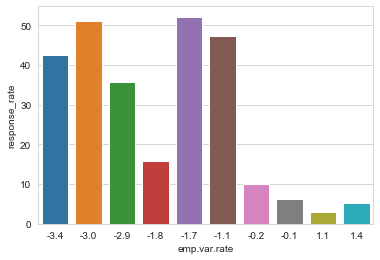

In [386]:
ax= sns.barplot(x='emp.var.rate',y='response_rate',data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels())

### From above bar plots wecan see that higher the employement rate in negative side, higher the conversion

### EDA on cons.price.idx

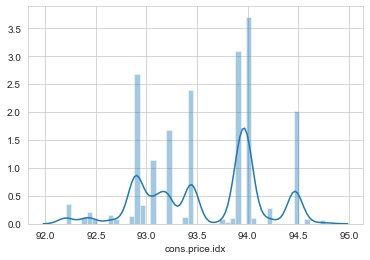

In [387]:
sns.distplot(loan['cons.price.idx'])

In [388]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

### EDA on cons.conf.idx

In [389]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

### EDA on Euroborn 3 Month Rate

In [390]:
loan['euribor3m'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

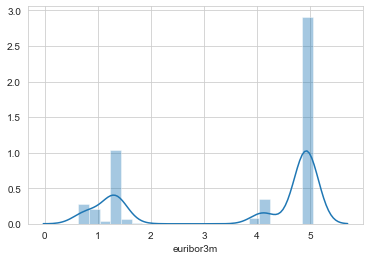

In [391]:
sns.distplot(loan['euribor3m'])

#### From above dist plot we can see that higher the euroborn rate, higher the conversion

### EDA on Number of Employees

In [392]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

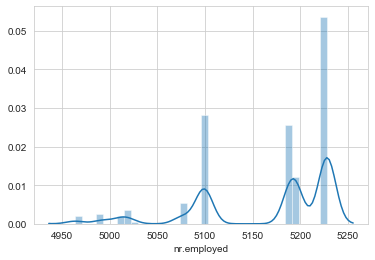

In [393]:
sns.distplot(loan['nr.employed'])

### Data preperation

In [394]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_bins'],
      dtype='object')

## drop age_bins as age will be treated as contineous variable

In [395]:
loan.drop(columns='age_bins',inplace=True)

### Createing a dummy varaible for job column

In [396]:
job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,job],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


### Creating dummy variables for all the categorical variables

## Marital

In [397]:
marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,marital],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,1,0
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,1,0
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0


### education

In [398]:
education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,education],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_Secondary,education_Tirtary,education_professional.course,education_unknown
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,1,0,0,0,0,0
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,0,0,0,0,1,0,1,0,0,0
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,0,0,0,0,1,0,1,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,1,0,0,0,0,0
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,0,0,0,0,1,0,1,0,0,0


### default

In [399]:
default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,default],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_unemployed,job_unknown,marital_married,marital_single,education_Secondary,education_Tirtary,education_professional.course,education_unknown,default_unknown,default_yes
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,0,0,0
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,0,0,1,0,1,0,0,0,1,0
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,0,0,1,0,1,0,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,0,0,0
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,0,0,1,0,1,0,0,0,0,0


In [400]:
### housing

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,housing],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_married,marital_single,education_Secondary,education_Tirtary,education_professional.course,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,0,0,0,0
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,1,0,1,0,0,0,1,0,0,0
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,1,0,1,0,0,0,0,0,0,1
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,1,0,1,0,0,0,0,0,0,0


### loan

In [401]:
loan_v = pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,loan_v],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,education_Secondary,education_Tirtary,education_professional.course,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,0,0
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,1,0,0,0,0,0,0,1,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,1,0,0,0,0,0,0,0,0,1


### contact

In [402]:
contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,contact],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,education_Tirtary,education_professional.course,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,1
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,0,1
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,0,0,0,0,0,0,1,0,0,1
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,1
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,0,0,0,0,0,0,0,0,1,1


### month

In [403]:
month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,month],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,0


### day_of_week

In [404]:
day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,day_of_week],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,1,0,0,0
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,0,0,1,0,0,0,1,0,0,0
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,0,0,1,0,0,0,1,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,1,0,0,0
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,0,0,1,0,0,0,1,0,0,0


### pdays

In [405]:
pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,pdays],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_last_10_Days,pdays_First_Time_Contacted
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,0,1
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,0,1
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,0,1
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,0,1
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,1,0,0,0,1,0,0,0,0,1


### prevoius

In [406]:
previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,previous],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_last_10_Days,pdays_First_Time_Contacted,previous_More than 3 times,previous_Never_contacted
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,1
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,1
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,1
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,1
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,1


### poutcome

In [407]:
poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
## Adding the results to master data frame
loan=pd.concat([loan,poutcome],axis=1)
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_last_10_Days,pdays_First_Time_Contacted,previous_More than 3 times,previous_Never_contacted,poutcome_nonexistent,poutcome_success
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


### Drop all the features for which the dummy variables were created

In [408]:
loan.drop(columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'],inplace=True)

In [409]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_last_10_Days,pdays_First_Time_Contacted,previous_More than 3 times,previous_Never_contacted,poutcome_nonexistent,poutcome_success
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0


### Let's revisit again all the columns to make sure that none of them are non-numeric

In [410]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 52 columns):
age                                41188 non-null int64
duration                           41188 non-null int64
campaign                           41188 non-null int64
emp.var.rate                       41188 non-null float64
cons.price.idx                     41188 non-null float64
cons.conf.idx                      41188 non-null float64
euribor3m                          41188 non-null float64
nr.employed                        41188 non-null float64
y                                  41188 non-null int64
job_blue-collar                    41188 non-null uint8
job_entrepreneur                   41188 non-null uint8
job_housemaid                      41188 non-null uint8
job_management                     41188 non-null uint8
job_retired                        41188 non-null uint8
job_self-employed                  41188 non-null uint8
job_services                       41188 

#### Since all the datatypes are int,unsigned int or float, hence, there is no non-nmeric column in the dataframe now

### The duration column is the something which says about how much duration the customer spend on call, wheres this can be measured only after the call was made, hence it's not wise to use this column as predictive column. So let's drop that column from our dataframe while splitting into train and test

### Split the data into train and test

In [411]:
from sklearn.model_selection import train_test_split

In [412]:
X= loan.drop(columns=['y','duration'],axis=True)
y=loan['y']

In [413]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [414]:
loan['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

### Scale the X_Train

In [415]:
# Standardisation continuous features for X_train
#X_train_df = X_train[['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [416]:
#std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [417]:
#X_train = X_train.drop(['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)
#X_train = pd.concat([X_train,std_X_train_df],axis=1)
#X_train.head()

In [418]:
from sklearn.preprocessing import MinMaxScaler

In [419]:
scaler = MinMaxScaler()

### We will perform the fit_transform on train data as we have fit as well as transform the train data

In [420]:
# Apply scaler() to all the conteneous variables 
num_vars = ['age', 'campaign', 'emp.var.rate', 'cons.price.idx','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [421]:
X_train[num_vars].describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,0.424856,0.115837,0.724982,0.535878,0.535878,0.430034,0.676613,0.768601
std,0.188818,0.177658,0.327072,0.225184,0.225184,0.193397,0.393385,0.273170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.000000,0.333333,0.340608,0.340608,0.338912,0.160961,0.512287
50%,0.388889,0.076923,0.937500,0.603274,0.603274,0.376569,0.957379,0.859735
75%,0.555556,0.153846,1.000000,0.698753,0.698753,0.602510,0.980957,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scale X_test
- We will only perform the transform operation here as the scaler should not learn anything from test, rather just transform the data on test set by what it learn in train set

In [422]:
X_test[num_vars]=scaler.transform(X_test[num_vars])

In [423]:
X_test[num_vars].describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000
mean,0.425670,0.114336,0.726351,0.535361,0.535361,0.432766,0.678692,0.770377
std,0.187632,0.175507,0.327786,0.226512,0.226512,0.194228,0.392811,0.273152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.000000,0.333333,0.340608,0.340608,0.338912,0.160961,0.512287
50%,0.388889,0.076923,0.937500,0.484412,0.484412,0.376569,0.957379,0.859735
75%,0.555556,0.153846,1.000000,0.698753,0.698753,0.602510,0.980957,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modelling 

## PCA
### Let's perform PCA

In [424]:
PCA_df=loan.drop(columns='duration')
PCA_df.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_last_10_Days,pdays_First_Time_Contacted,previous_More than 3 times,previous_Never_contacted,poutcome_nonexistent,poutcome_success
pr_id,,,,,,,,,,,,,,,,,,,,,
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


#### split the dataframe into X_train,X_test and y_train,y_test

In [425]:
X_PCA=PCA_df.drop(columns='y')
y_PCA=PCA_df['y']
X_trainPCA,X_testPCA,y_trainPCA,y_testPCA=train_test_split(X_PCA,y_PCA,train_size=0.7,random_state=100)

In [426]:
print("lenth of X_trainPCA is ",len(X_trainPCA))
print("lenth of y_trainPCA is ",len(y_trainPCA))
print("lenth of X_testPCA is ",len(X_testPCA))
print("lenth of y_testPCA is ",len(y_testPCA))

lenth of X_trainPCA is  28831
lenth of y_trainPCA is  28831
lenth of X_testPCA is  12357
lenth of y_testPCA is  12357


#### Scale the contineous variables of X_trainPCA (fit_transform)

In [427]:
num_vars

['age',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [428]:
X_trainPCA[num_vars] = scaler.fit_transform(X_trainPCA[num_vars])

In [429]:
X_trainPCA[num_vars].describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,0.424856,0.115837,0.724982,0.535878,0.535878,0.430034,0.676613,0.768601
std,0.188818,0.177658,0.327072,0.225184,0.225184,0.193397,0.393385,0.273170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.000000,0.333333,0.340608,0.340608,0.338912,0.160961,0.512287
50%,0.388889,0.076923,0.937500,0.603274,0.603274,0.376569,0.957379,0.859735
75%,0.555556,0.153846,1.000000,0.698753,0.698753,0.602510,0.980957,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Scale the contenious variables of X_testPCA(only transform)

In [430]:
X_testPCA[num_vars]=scaler.transform(X_testPCA[num_vars])

In [431]:
X_testPCA[num_vars].describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000
mean,0.425670,0.114336,0.726351,0.535361,0.535361,0.432766,0.678692,0.770377
std,0.187632,0.175507,0.327786,0.226512,0.226512,0.194228,0.392811,0.273152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.000000,0.333333,0.340608,0.340608,0.338912,0.160961,0.512287
50%,0.388889,0.076923,0.937500,0.484412,0.484412,0.376569,0.957379,0.859735
75%,0.555556,0.153846,1.000000,0.698753,0.698753,0.602510,0.980957,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [432]:
##Intialize PCA component
pca = PCA(random_state=42)

#### fit the PCA on X_trainPCA

In [433]:
pca.fit(X_trainPCA)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

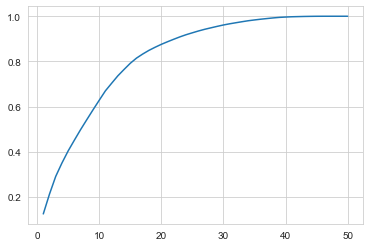

In [434]:
cumm=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),cumm)
plt.grid(True)

In [435]:
X_trainPCA.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_last_10_Days,pdays_First_Time_Contacted,previous_More than 3 times,previous_Never_contacted,poutcome_nonexistent,poutcome_success
pr_id,,,,,,,,,,,,,,,,,,,,,
7019,0.259259,0.230769,0.937500,0.698753,0.602510,0.958059,0.859735,0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,0.629630,0.153846,0.687500,0.389322,0.368201,0.767853,0.877883,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,0.407407,0.153846,1.000000,0.669135,0.338912,0.980730,1.000000,0,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,0.944444,0.230769,0.479167,0.935308,0.054393,0.082974,0.000000,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,0.370370,0.153846,1.000000,0.882307,0.376569,0.958966,1.000000,0,0,0,...,0,0,1,0,0,1,0,1,1,0


#### From above plot we can see that more than 95% variance be explained by 30 components

In [436]:
IncPCA=IncrementalPCA(n_components=30)

In [437]:
PC_col=[]
for i in range(1,31):
  PC_col.append('PC'+str(i))
Inc_PCA_ins=IncPCA.fit_transform(X_trainPCA)
temp=pd.DataFrame(IncPCA.fit_transform(X_trainPCA),columns=PC_col)
temp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,0.537280,0.234180,0.100102,0.894715,0.710874,-0.166261,-0.099478,0.933338,-0.320651,0.099384,...,-0.170691,0.045709,-0.016666,0.009618,-0.010207,0.089568,-0.046119,0.005458,0.199193,0.084124
1,-0.075905,-0.843815,0.389444,-0.002947,0.490305,-0.280325,0.442444,-0.118401,-0.157874,-0.354473,...,0.447494,0.299195,0.080181,0.024231,0.146891,-0.385184,0.037278,-0.045686,-0.466465,0.206808
2,-0.048107,-1.374301,-0.161798,0.149537,-0.450144,0.414911,-0.641871,-0.580097,-0.397160,0.204464,...,-0.140386,0.017703,0.006083,-0.090766,0.139171,0.077415,0.016311,-0.016700,0.080986,0.025539
3,-1.368192,0.386458,0.123510,-0.753655,0.008395,-0.555079,-0.678286,-0.410445,-0.479537,-0.415163,...,0.268378,-0.353494,-0.518832,-0.042358,0.438424,0.115468,0.009411,0.172463,0.263050,-0.459446
4,0.856732,0.041007,0.032454,-0.319970,0.150460,-1.150595,0.131742,0.067935,0.062241,-0.093732,...,0.138065,-0.073292,0.172216,-0.012571,0.076222,0.129322,-0.032525,0.029640,-0.063520,-0.007699


In [438]:
temp['pr_id']=X_trainPCA.index
temp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,pr_id
0,0.537280,0.234180,0.100102,0.894715,0.710874,-0.166261,-0.099478,0.933338,-0.320651,0.099384,...,0.045709,-0.016666,0.009618,-0.010207,0.089568,-0.046119,0.005458,0.199193,0.084124,7019
1,-0.075905,-0.843815,0.389444,-0.002947,0.490305,-0.280325,0.442444,-0.118401,-0.157874,-0.354473,...,0.299195,0.080181,0.024231,0.146891,-0.385184,0.037278,-0.045686,-0.466465,0.206808,27175
2,-0.048107,-1.374301,-0.161798,0.149537,-0.450144,0.414911,-0.641871,-0.580097,-0.397160,0.204464,...,0.017703,0.006083,-0.090766,0.139171,0.077415,0.016311,-0.016700,0.080986,0.025539,15817
3,-1.368192,0.386458,0.123510,-0.753655,0.008395,-0.555079,-0.678286,-0.410445,-0.479537,-0.415163,...,-0.353494,-0.518832,-0.042358,0.438424,0.115468,0.009411,0.172463,0.263050,-0.459446,40971
4,0.856732,0.041007,0.032454,-0.319970,0.150460,-1.150595,0.131742,0.067935,0.062241,-0.093732,...,-0.073292,0.172216,-0.012571,0.076222,0.129322,-0.032525,0.029640,-0.063520,-0.007699,8467


In [439]:
X_trainPCA=temp.set_index('pr_id')
X_trainPCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
pr_id,,,,,,,,,,,,,,,,,,,,,
7019,0.537280,0.234180,0.100102,0.894715,0.710874,-0.166261,-0.099478,0.933338,-0.320651,0.099384,...,-0.170691,0.045709,-0.016666,0.009618,-0.010207,0.089568,-0.046119,0.005458,0.199193,0.084124
27175,-0.075905,-0.843815,0.389444,-0.002947,0.490305,-0.280325,0.442444,-0.118401,-0.157874,-0.354473,...,0.447494,0.299195,0.080181,0.024231,0.146891,-0.385184,0.037278,-0.045686,-0.466465,0.206808
15817,-0.048107,-1.374301,-0.161798,0.149537,-0.450144,0.414911,-0.641871,-0.580097,-0.397160,0.204464,...,-0.140386,0.017703,0.006083,-0.090766,0.139171,0.077415,0.016311,-0.016700,0.080986,0.025539
40971,-1.368192,0.386458,0.123510,-0.753655,0.008395,-0.555079,-0.678286,-0.410445,-0.479537,-0.415163,...,0.268378,-0.353494,-0.518832,-0.042358,0.438424,0.115468,0.009411,0.172463,0.263050,-0.459446
8467,0.856732,0.041007,0.032454,-0.319970,0.150460,-1.150595,0.131742,0.067935,0.062241,-0.093732,...,0.138065,-0.073292,0.172216,-0.012571,0.076222,0.129322,-0.032525,0.029640,-0.063520,-0.007699


#### Perform PCA on X_testPCA as well (transorm only)

In [440]:
temp=pd.DataFrame(IncPCA.transform(X_testPCA),columns=PC_col)
temp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.939482,-0.260005,0.989578,-0.546025,0.484512,-0.346618,0.001663,0.061210,0.372968,1.009835,...,-0.252639,-0.089031,0.207076,0.025414,0.062405,0.131758,-0.025503,-0.032413,0.008663,-0.027749
1,0.048389,0.083536,-0.692012,-0.032075,-0.523452,-0.318302,1.070268,-0.329520,-0.189117,-0.118298,...,-0.098778,-0.005615,0.031095,-0.088383,0.077381,-0.434884,-0.018745,0.064305,0.081066,0.125916
2,0.584010,0.140049,-0.342482,-1.045601,-0.596249,0.326471,-0.624125,-0.528321,-0.344253,0.201170,...,-0.097235,-0.023658,-0.193197,-0.020800,0.024456,0.082664,0.010122,0.018587,0.169777,-0.151111
3,-1.981745,-0.474763,-0.167424,0.439932,0.213778,-0.072984,-0.179059,-0.054875,0.317987,-0.096619,...,-0.173335,-0.281668,0.154473,0.034930,-0.057603,0.056086,0.018057,0.030108,-0.057547,-0.006206
4,0.777557,0.579355,0.742426,-0.118762,-0.579295,-0.934480,-0.101603,0.257081,0.370591,0.830463,...,0.179959,-0.015462,-0.126473,-0.078729,0.140703,0.109944,0.026710,0.066821,-0.008442,-0.052406


In [441]:
temp['pr_id']=X_testPCA.index
temp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,pr_id
0,-0.939482,-0.260005,0.989578,-0.546025,0.484512,-0.346618,0.001663,0.061210,0.372968,1.009835,...,-0.089031,0.207076,0.025414,0.062405,0.131758,-0.025503,-0.032413,0.008663,-0.027749,33148
1,0.048389,0.083536,-0.692012,-0.032075,-0.523452,-0.318302,1.070268,-0.329520,-0.189117,-0.118298,...,-0.005615,0.031095,-0.088383,0.077381,-0.434884,-0.018745,0.064305,0.081066,0.125916,27585
2,0.584010,0.140049,-0.342482,-1.045601,-0.596249,0.326471,-0.624125,-0.528321,-0.344253,0.201170,...,-0.023658,-0.193197,-0.020800,0.024456,0.082664,0.010122,0.018587,0.169777,-0.151111,15722
3,-1.981745,-0.474763,-0.167424,0.439932,0.213778,-0.072984,-0.179059,-0.054875,0.317987,-0.096619,...,-0.281668,0.154473,0.034930,-0.057603,0.056086,0.018057,0.030108,-0.057547,-0.006206,40349
4,0.777557,0.579355,0.742426,-0.118762,-0.579295,-0.934480,-0.101603,0.257081,0.370591,0.830463,...,-0.015462,-0.126473,-0.078729,0.140703,0.109944,0.026710,0.066821,-0.008442,-0.052406,2576


In [442]:
X_testPCA=temp.set_index('pr_id')
X_testPCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
pr_id,,,,,,,,,,,,,,,,,,,,,
33148,-0.939482,-0.260005,0.989578,-0.546025,0.484512,-0.346618,0.001663,0.061210,0.372968,1.009835,...,-0.252639,-0.089031,0.207076,0.025414,0.062405,0.131758,-0.025503,-0.032413,0.008663,-0.027749
27585,0.048389,0.083536,-0.692012,-0.032075,-0.523452,-0.318302,1.070268,-0.329520,-0.189117,-0.118298,...,-0.098778,-0.005615,0.031095,-0.088383,0.077381,-0.434884,-0.018745,0.064305,0.081066,0.125916
15722,0.584010,0.140049,-0.342482,-1.045601,-0.596249,0.326471,-0.624125,-0.528321,-0.344253,0.201170,...,-0.097235,-0.023658,-0.193197,-0.020800,0.024456,0.082664,0.010122,0.018587,0.169777,-0.151111
40349,-1.981745,-0.474763,-0.167424,0.439932,0.213778,-0.072984,-0.179059,-0.054875,0.317987,-0.096619,...,-0.173335,-0.281668,0.154473,0.034930,-0.057603,0.056086,0.018057,0.030108,-0.057547,-0.006206
2576,0.777557,0.579355,0.742426,-0.118762,-0.579295,-0.934480,-0.101603,0.257081,0.370591,0.830463,...,0.179959,-0.015462,-0.126473,-0.078729,0.140703,0.109944,0.026710,0.066821,-0.008442,-0.052406


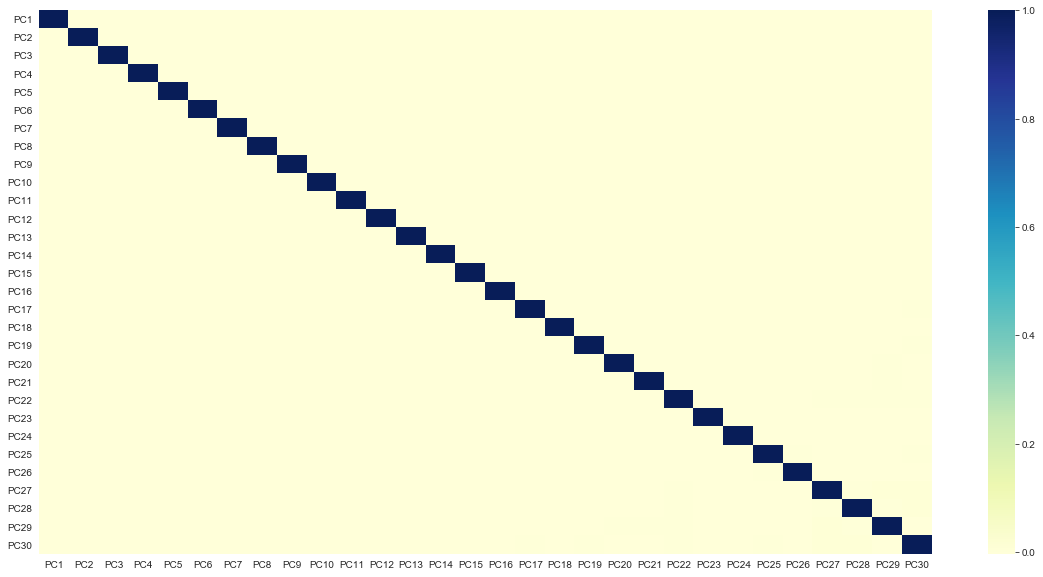

In [443]:
cor=X_trainPCA.corr()
round(cor,3)
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

### From above heatmap, we can see that there is no correlation between any of the principal components

### Hyper parameter Tuning for logistic regression

In [444]:
logistic = LogisticRegression(class_weight='balanced')
# create pipeline
steps = [("logistic", logistic)]

# compile pipeline
log_PCA = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
PCA_lg = GridSearchCV(estimator=log_PCA, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [445]:
# fit model
PCA_lg.fit(X_trainPCA, y_trainPCA)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   15.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                             

In [446]:
# print best hyperparameters
print("Best AUC: ", PCA_lg.best_score_)
print("Best hyperparameters: ", PCA_lg.best_params_)

Best AUC:  0.7903859538818719
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1'}


In [447]:
y_train_pred=PCA_lg.predict_proba(X_trainPCA)
y_train_pred

array([[0.78985117, 0.21014883],
       [0.68057475, 0.31942525],
       [0.6428363 , 0.3571637 ],
       ...,
       [0.70466639, 0.29533361],
       [0.80538227, 0.19461773],
       [0.07624381, 0.92375619]])

#### Let's add 2 columns in our dataFrame for probability of being 0 and 1

In [448]:
### Create a temp dataframe having the columns for probability for '0' and '1'
y_train_pred = pd.DataFrame.from_records(y_train_pred)
y_train_pred=y_train_pred.rename(columns={0: 'prob_0',1:'prob_1'})
y_train_pred.head()

,prob_0,prob_1
0,0.789851,0.210149
1,0.680575,0.319425
2,0.642836,0.357164
3,0.218603,0.781397
4,0.702890,0.297110


In [449]:
len(y_train_pred)

28831

In [450]:
len(y_trainPCA)

28831

In [451]:
### Convert y_test to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_trainPCA)
temp2= temp2.reset_index()
temp2.head()

,pr_id,y
0,7019,0
1,27175,0
2,15817,0
3,40971,0
4,8467,0


In [452]:
### Add the columns of previous dataframe into y_test_pred
y_train_pred['pr_id']=temp2['pr_id']
y_train_pred['y_actual']=temp2['y']
y_train_pred.head()

,prob_0,prob_1,pr_id,y_actual
0,0.789851,0.210149,7019,0
1,0.680575,0.319425,27175,0
2,0.642836,0.357164,15817,0
3,0.218603,0.781397,40971,0
4,0.702890,0.297110,8467,0


In [453]:
len(y_train_pred)

28831

#### Let's create a dataframe having the predicted probablilies on different cutoffs ranging from 0.0,0.1,0.2 and so on to 1.0

In [454]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred[i]=y_train_pred.prob_1.map(lambda x: 1 if x>i else 0)
y_train_pred.head()

,prob_0,prob_1,pr_id,y_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.789851,0.210149,7019,0,1,1,1,0,0,0,0,0,0,0
1,0.680575,0.319425,27175,0,1,1,1,1,0,0,0,0,0,0
2,0.642836,0.357164,15817,0,1,1,1,1,0,0,0,0,0,0
3,0.218603,0.781397,40971,0,1,1,1,1,1,1,1,1,0,0
4,0.702890,0.297110,8467,0,1,1,1,0,0,0,0,0,0,0


In [455]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.y_actual, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.113003,1.000000,0.000000
0.1,0.1,0.113489,0.999693,0.000587
0.2,0.2,0.227013,0.970227,0.132327
0.3,0.3,0.486976,0.859116,0.439565
0.4,0.4,0.733655,0.720074,0.735385
0.5,0.5,0.807742,0.655003,0.827201
0.6,0.6,0.847386,0.602210,0.878622
0.7,0.7,0.873019,0.533149,0.916318
0.8,0.8,0.891124,0.346532,0.960505
0.9,0.9,0.897541,0.194291,0.987135


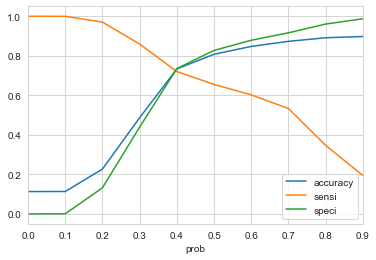

In [456]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

### From the above plot we can see that 0.4 is the optimal probablity cut-off where the accuracy, senstivity and specificity is highest
### So the predicted values for the train data set would be as below

In [457]:
temp=y_train_pred[['pr_id','y_actual','prob_1']]
temp['predicted']=temp.prob_1.map(lambda x: 1 if x>0.4 else 0)
y_train_pred=temp
y_train_pred.head()

,pr_id,y_actual,prob_1,predicted
0,7019,0,0.210149,0
1,27175,0,0.319425,0
2,15817,0,0.357164,0
3,40971,0,0.781397,1
4,8467,0,0.297110,0


#### Let'check the overall accuracy on train set

In [458]:
metrics.accuracy_score(y_train_pred.y_actual,y_train_pred.predicted)

0.7336547466268947

#### Let's create the confusion metrics as well on test data and verify other metrics as well

In [459]:
#confusion Matrix
confusion=metrics.confusion_matrix(y_train_pred.y_actual,y_train_pred.predicted)
print(confusion)

[[18806  6767]
 [  912  2346]]


#### Let's check the Senstivity and Specifity

In [460]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [461]:
## Sestivity
TP/float(TP+FN)

0.7200736648250461

In [462]:
## Specifity
TN/float(TN+FP)

0.735384976342236

#### Let's check the Precision and Recall as well

In [463]:
## Precision
TP/float(TP+FP)

0.25743443432459123

In [464]:
## Recall
TP/float(TP+FN)

0.7200736648250461

#### Now let's add the duration column on y_train_pred dataframe
#### Also let's add a columnnamed cost, considering that the cost is 1 Rs per min

In [465]:
temp=y_train_pred.merge(loan['duration'],on='pr_id')
temp['cost']=round((temp['duration']/60),2)
temp=temp.sort_values('prob_1',ascending = False)
#temp.head()
y_train_pred=temp
y_train_pred.head()

,pr_id,y_actual,prob_1,predicted,duration,cost
10888,38274,1,0.986017,1,896,14.93
18003,38539,1,0.984943,1,207,3.45
19758,38432,1,0.983878,1,133,2.22
17097,38415,1,0.983656,1,512,8.53
24150,37916,1,0.982955,1,385,6.42


### Make the predictions on the test set

In [466]:
y_test_pred=PCA_lg.predict_proba(X_testPCA)
y_test_pred

array([[0.46169258, 0.53830742],
       [0.67706327, 0.32293673],
       [0.70451528, 0.29548472],
       ...,
       [0.48181848, 0.51818152],
       [0.21415087, 0.78584913],
       [0.22396695, 0.77603305]])

### Let's add 2 columns in our dataFrame for probability of being 0 and 1

In [467]:
y_test_pred = pd.DataFrame.from_records(y_test_pred)
y_test_pred=y_test_pred.rename(columns={0: 'prob_0',1:'prob_1'})
y_test_pred.head()

,prob_0,prob_1
0,0.461693,0.538307
1,0.677063,0.322937
2,0.704515,0.295485
3,0.048004,0.951996
4,0.794026,0.205974


In [468]:
len(y_test_pred)

12357

In [469]:
len(y_test)

12357

In [470]:
### Convert y_test to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_testPCA)
temp2= temp2.reset_index()
temp2.head()

,pr_id,y
0,33148,0
1,27585,0
2,15722,0
3,40349,1
4,2576,0


In [471]:
### Add the columns of previous dataframe into y_test_pred
y_test_pred['pr_id']=temp2['pr_id']
y_test_pred['y_actual']=temp2['y']
y_test_pred.head()

,prob_0,prob_1,pr_id,y_actual
0,0.461693,0.538307,33148,0
1,0.677063,0.322937,27585,0
2,0.704515,0.295485,15722,0
3,0.048004,0.951996,40349,1
4,0.794026,0.205974,2576,0


In [472]:
len(y_test_pred)

12357

In [473]:
temp=y_test_pred[['pr_id','y_actual','prob_1']]
temp['predicted']=temp.prob_1.map(lambda x: 1 if x>0.4 else 0)
y_test_pred=temp
y_test_pred.head()

,pr_id,y_actual,prob_1,predicted
0,33148,0,0.538307,1
1,27585,0,0.322937,0
2,15722,0,0.295485,0
3,40349,1,0.951996,1
4,2576,0,0.205974,0


### Let'check the overall accuracy on test set

In [474]:
metrics.accuracy_score(y_test_pred.y_actual,y_test_pred.predicted)

0.7322974832078983

#### Let's create the confusion metrics as well on test data and verify other metrics as well

In [475]:
#confusion Matrix
confusion=metrics.confusion_matrix(y_test_pred.y_actual,y_test_pred.predicted)
print(confusion)

[[8076 2899]
 [ 409  973]]


### Let's check the Senstivity and Specifity

In [476]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [477]:
## Sestivity
TP/float(TP+FN)

0.7040520984081042

In [478]:
## Specifity
TN/float(TN+FP)

0.7358542141230069

#### Let's check the Precision and Recall as well

In [479]:
## Precision
TP/float(TP+FP)

0.2512913223140496

In [480]:
## Recall
TP/float(TP+FN)

0.7040520984081042

### Now let's add the duration column on y_test_pred dataframe
### Also let's add a columnnamed cost, considering that the cost is 1 Rs per min

In [481]:
temp=y_test_pred.merge(loan['duration'],on='pr_id')
temp['cost']=round((temp['duration']/60),2)
temp=temp.sort_values('prob_1',ascending = False)
#temp.head()
y_test_pred=temp

### As per the business objective we have to convert the 80% pf the prospects
### So let's created deciles and assign the decile label to each row, based on which decile that the value of prob_1 of that row falls

In [482]:
y_test_pred['decile'] = pd.qcut(y_test_pred['prob_1'], 10, labels=np.arange(10, 0, -1))
y_test_pred['decile_range']=pd.qcut(y_test_pred['prob_1'], q=10, precision=0)
y_test_pred.head()

,pr_id,y_actual,prob_1,predicted,duration,cost,decile,decile_range
11295,38128,0,0.982691,1,81,1.35,1,"(0.76, 0.98]"
8875,38487,0,0.982211,1,120,2.00,1,"(0.76, 0.98]"
3723,38287,0,0.981729,1,113,1.88,1,"(0.76, 0.98]"
6293,38316,1,0.981417,1,134,2.23,1,"(0.76, 0.98]"
338,38270,1,0.981225,1,210,3.50,1,"(0.76, 0.98]"


#### Now create a dataframe containing the count of values falling in each decile

In [483]:
lift_df = y_test_pred.groupby('decile')['prob_1'].count().reset_index()
lift_df

,decile,prob_1
0,10,1236
1,9,1236
2,8,1235
3,7,1236
4,6,1237
5,5,1234
6,4,1236
7,3,1235
8,2,1236
9,1,1236


#### Now create a temporary dataframe, containing the Total calling cost for each decile

In [484]:
tmp= y_test_pred.groupby('decile')['cost'].sum().reset_index()
tmp

,decile,cost
0,10,4953.70
1,9,5162.67
2,8,5001.56
3,7,5030.55
4,6,4988.03
5,5,5038.38
6,4,5097.92
7,3,5274.67
8,2,5423.19
9,1,6007.54


#### Merge the 2 dataframes on decile column

In [485]:
lift_df=lift_df.merge(tmp, on = 'decile')
lift_df

,decile,prob_1,cost
0,10,1236,4953.70
1,9,1236,5162.67
2,8,1235,5001.56
3,7,1236,5030.55
4,6,1237,4988.03
5,5,1234,5038.38
6,4,1236,5097.92
7,3,1235,5274.67
8,2,1236,5423.19
9,1,1236,6007.54


### create a tmp dataframe having sum of duration corresponding to each decile

In [486]:
tmp= y_test_pred.groupby('decile')['duration'].sum().reset_index()
tmp

,decile,duration
0,10,297220
1,9,309753
2,8,300092
3,7,301832
4,6,299285
5,5,302313
6,4,305871
7,3,316486
8,2,325405
9,1,360462


#### Merge this dataframe as well on decile column into lift_df

In [487]:
lift_df=lift_df.merge(tmp, on = 'decile')
lift_df

,decile,prob_1,cost,duration
0,10,1236,4953.70,297220
1,9,1236,5162.67,309753
2,8,1235,5001.56,300092
3,7,1236,5030.55,301832
4,6,1237,4988.03,299285
5,5,1234,5038.38,302313
6,4,1236,5097.92,305871
7,3,1235,5274.67,316486
8,2,1236,5423.19,325405
9,1,1236,6007.54,360462


In [488]:
### Rename the prob_1 to total, to make sense(ie the total count of prospects falling into that decile)
lift_df.rename({'prob_1':'total'}, axis=1, inplace=True)

In [489]:
lift_df

,decile,total,cost,duration
0,10,1236,4953.70,297220
1,9,1236,5162.67,309753
2,8,1235,5001.56,300092
3,7,1236,5030.55,301832
4,6,1237,4988.03,299285
5,5,1234,5038.38,302313
6,4,1236,5097.92,305871
7,3,1235,5274.67,316486
8,2,1236,5423.19,325405
9,1,1236,6007.54,360462


#### Now create a dataframe containing the count of actual converted prospect falling in each decile

In [490]:
lift_df_pred = y_test_pred[y_test_pred['y_actual']==1].groupby('decile')['y_actual'].count().reset_index()
lift_df_pred

,decile,y_actual
0,10,28
1,9,43
2,8,70
3,7,72
4,6,63
5,5,67
6,4,83
7,3,113
8,2,266
9,1,577


#### Merge the 2 dataframes

In [491]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')
lift_df_final

,decile,total,cost,duration,y_actual
0,10,1236,4953.70,297220,28
1,9,1236,5162.67,309753,43
2,8,1235,5001.56,300092,70
3,7,1236,5030.55,301832,72
4,6,1237,4988.03,299285,63
5,5,1234,5038.38,302313,67
6,4,1236,5097.92,305871,83
7,3,1235,5274.67,316486,113
8,2,1236,5423.19,325405,266
9,1,1236,6007.54,360462,577


In [492]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final

,decile,total,cost,duration,y_actual
9,1,1236,6007.54,360462,577
8,2,1236,5423.19,325405,266
7,3,1235,5274.67,316486,113
6,4,1236,5097.92,305871,83
5,5,1234,5038.38,302313,67
4,6,1237,4988.03,299285,63
3,7,1236,5030.55,301832,72
2,8,1235,5001.56,300092,70
1,9,1236,5162.67,309753,43
0,10,1236,4953.70,297220,28


#### Add a column 'cumresp' (the cumilative sum of the responders)

In [493]:
lift_df_final['cumresp'] = lift_df_final['y_actual'].cumsum()
lift_df_final

,decile,total,cost,duration,y_actual,cumresp
9,1,1236,6007.54,360462,577,577
8,2,1236,5423.19,325405,266,843
7,3,1235,5274.67,316486,113,956
6,4,1236,5097.92,305871,83,1039
5,5,1234,5038.38,302313,67,1106
4,6,1237,4988.03,299285,63,1169
3,7,1236,5030.55,301832,72,1241
2,8,1235,5001.56,300092,70,1311
1,9,1236,5162.67,309753,43,1354
0,10,1236,4953.70,297220,28,1382


#### Add a column "gain" (How much percentage of customers converted in each decile, cumilatively)

In [494]:
lift_df_final['gain'] = round(100*(lift_df_final['cumresp']/sum(lift_df_final['y_actual'])),2)
lift_df_final

,decile,total,cost,duration,y_actual,cumresp,gain
9,1,1236,6007.54,360462,577,577,41.75
8,2,1236,5423.19,325405,266,843,61.00
7,3,1235,5274.67,316486,113,956,69.18
6,4,1236,5097.92,305871,83,1039,75.18
5,5,1234,5038.38,302313,67,1106,80.03
4,6,1237,4988.03,299285,63,1169,84.59
3,7,1236,5030.55,301832,72,1241,89.80
2,8,1235,5001.56,300092,70,1311,94.86
1,9,1236,5162.67,309753,43,1354,97.97
0,10,1236,4953.70,297220,28,1382,100.00


## So from above dataframe it's evident, that if we  target top 5 deciles or just 50% of the population, we can convert 80% prospects which was our business objective

In [495]:
total_prospects= lift_df_final[lift_df_final['decile']>=5].total.sum()
total_duration=lift_df_final[lift_df_final['decile']>=5].duration.sum()
avg_call_duration=round(total_duration/total_prospects,2)
print("Average Call duration for calling top 50% population is ",avg_call_duration)

Average Call duration for calling top 50% population is  260.73


## Average Call duration for targeting top 50% prospects is 260.73 seconds as per below

### Let's plot the gain chart 

In [496]:
lift_df_final['res_ratio']=lift_df_final['y_actual']/lift_df_final['total']

In [497]:
lift_df_final['res_ratio_per']=lift_df_final['res_ratio']*100
lift_df_final['radom_guess']=lift_df_final.y_actual.sum()/10
lift_df_final

,decile,total,cost,duration,y_actual,cumresp,gain,res_ratio,res_ratio_per,radom_guess
9,1,1236,6007.54,360462,577,577,41.75,0.466828,46.682848,138.2
8,2,1236,5423.19,325405,266,843,61.00,0.215210,21.521036,138.2
7,3,1235,5274.67,316486,113,956,69.18,0.091498,9.149798,138.2
6,4,1236,5097.92,305871,83,1039,75.18,0.067152,6.715210,138.2
5,5,1234,5038.38,302313,67,1106,80.03,0.054295,5.429498,138.2
4,6,1237,4988.03,299285,63,1169,84.59,0.050930,5.092967,138.2
3,7,1236,5030.55,301832,72,1241,89.80,0.058252,5.825243,138.2
2,8,1235,5001.56,300092,70,1311,94.86,0.056680,5.668016,138.2
1,9,1236,5162.67,309753,43,1354,97.97,0.034790,3.478964,138.2
0,10,1236,4953.70,297220,28,1382,100.00,0.022654,2.265372,138.2


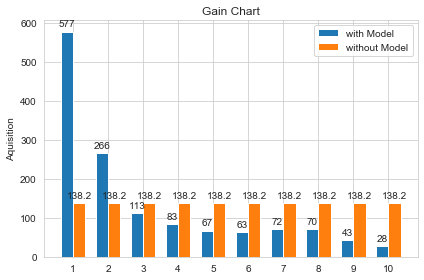

In [498]:
#lift_df_final.plot.line(x='decile', y=(['res_ratio_per']))
#plot.title("")

#sns.barplot(x = 'decile', y = ['y_actual','random_guess'], data = lift_df_final,
            #palette = 'Blues',order=lift_df_final.sort_values('decile',ascending=False).decile)

x=np.arange(len(lift_df_final))
width=0.35
labels=lift_df_final.decile
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lift_df_final['y_actual'], width, label='with Model')
rects2 = ax.bar(x + width/2, lift_df_final['radom_guess'], width, label='without Model')
ax.set_ylabel('Aquisition')
ax.set_title('Gain Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [499]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))
lift_df_final.head()

,decile,total,cost,duration,y_actual,cumresp,gain,res_ratio,res_ratio_per,radom_guess,cumlift
9,1,1236,6007.54,360462,577,577,41.75,0.466828,46.682848,138.2,4.1750
8,2,1236,5423.19,325405,266,843,61.00,0.215210,21.521036,138.2,3.0500
7,3,1235,5274.67,316486,113,956,69.18,0.091498,9.149798,138.2,2.3060
6,4,1236,5097.92,305871,83,1039,75.18,0.067152,6.715210,138.2,1.8795
5,5,1234,5038.38,302313,67,1106,80.03,0.054295,5.429498,138.2,1.6006


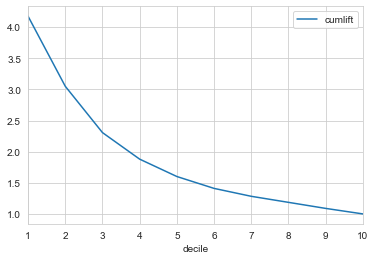

In [500]:
lift_df_final.plot.line(x='decile', y=['cumlift'])

In [501]:
lift_df_final['total_cumsum']=lift_df_final['total'].cumsum()
lift_df_final['total_cumsum_per']=round(lift_df_final['total_cumsum']/lift_df_final['total'].sum()*100,0)
lift_df_final

,decile,total,cost,duration,y_actual,cumresp,gain,res_ratio,res_ratio_per,radom_guess,cumlift,total_cumsum,total_cumsum_per
9,1,1236,6007.54,360462,577,577,41.75,0.466828,46.682848,138.2,4.175000,1236,10.0
8,2,1236,5423.19,325405,266,843,61.00,0.215210,21.521036,138.2,3.050000,2472,20.0
7,3,1235,5274.67,316486,113,956,69.18,0.091498,9.149798,138.2,2.306000,3707,30.0
6,4,1236,5097.92,305871,83,1039,75.18,0.067152,6.715210,138.2,1.879500,4943,40.0
5,5,1234,5038.38,302313,67,1106,80.03,0.054295,5.429498,138.2,1.600600,6177,50.0
4,6,1237,4988.03,299285,63,1169,84.59,0.050930,5.092967,138.2,1.409833,7414,60.0
3,7,1236,5030.55,301832,72,1241,89.80,0.058252,5.825243,138.2,1.282857,8650,70.0
2,8,1235,5001.56,300092,70,1311,94.86,0.056680,5.668016,138.2,1.185750,9885,80.0
1,9,1236,5162.67,309753,43,1354,97.97,0.034790,3.478964,138.2,1.088556,11121,90.0
0,10,1236,4953.70,297220,28,1382,100.00,0.022654,2.265372,138.2,1.000000,12357,100.0


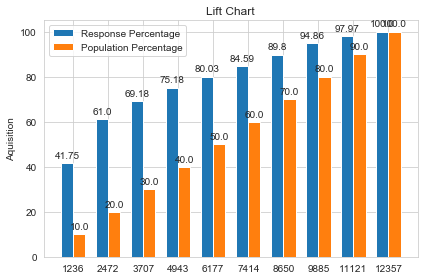

In [502]:
x=np.arange(len(lift_df_final))
width=0.35
labels=lift_df_final.total_cumsum
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lift_df_final['gain'], width, label='Response Percentage')
rects2 = ax.bar(x + width/2, lift_df_final['total_cumsum_per'], width, label='Population Percentage')
ax.set_ylabel('Aquisition')
ax.set_title('Lift Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Cost of aquisation

In [503]:
lift_df_final

,decile,total,cost,duration,y_actual,cumresp,gain,res_ratio,res_ratio_per,radom_guess,cumlift,total_cumsum,total_cumsum_per
9,1,1236,6007.54,360462,577,577,41.75,0.466828,46.682848,138.2,4.175000,1236,10.0
8,2,1236,5423.19,325405,266,843,61.00,0.215210,21.521036,138.2,3.050000,2472,20.0
7,3,1235,5274.67,316486,113,956,69.18,0.091498,9.149798,138.2,2.306000,3707,30.0
6,4,1236,5097.92,305871,83,1039,75.18,0.067152,6.715210,138.2,1.879500,4943,40.0
5,5,1234,5038.38,302313,67,1106,80.03,0.054295,5.429498,138.2,1.600600,6177,50.0
4,6,1237,4988.03,299285,63,1169,84.59,0.050930,5.092967,138.2,1.409833,7414,60.0
3,7,1236,5030.55,301832,72,1241,89.80,0.058252,5.825243,138.2,1.282857,8650,70.0
2,8,1235,5001.56,300092,70,1311,94.86,0.056680,5.668016,138.2,1.185750,9885,80.0
1,9,1236,5162.67,309753,43,1354,97.97,0.034790,3.478964,138.2,1.088556,11121,90.0
0,10,1236,4953.70,297220,28,1382,100.00,0.022654,2.265372,138.2,1.000000,12357,100.0


### Cost of aquiring 80% customers

In [504]:
lift_df_final[lift_df_final.index >4].cost.sum()

26841.699999999993

### Cost of aquring all the customers without model

In [505]:
lift_df_final.cost.sum()

51978.209999999985

### Financial benifit

In [506]:
(lift_df_final.cost.sum()-lift_df_final[lift_df_final.index >4].cost.sum())/lift_df_final.cost.sum()*100

48.35970688486579

In [507]:
lift_df_final

,decile,total,cost,duration,y_actual,cumresp,gain,res_ratio,res_ratio_per,radom_guess,cumlift,total_cumsum,total_cumsum_per
9,1,1236,6007.54,360462,577,577,41.75,0.466828,46.682848,138.2,4.175000,1236,10.0
8,2,1236,5423.19,325405,266,843,61.00,0.215210,21.521036,138.2,3.050000,2472,20.0
7,3,1235,5274.67,316486,113,956,69.18,0.091498,9.149798,138.2,2.306000,3707,30.0
6,4,1236,5097.92,305871,83,1039,75.18,0.067152,6.715210,138.2,1.879500,4943,40.0
5,5,1234,5038.38,302313,67,1106,80.03,0.054295,5.429498,138.2,1.600600,6177,50.0
4,6,1237,4988.03,299285,63,1169,84.59,0.050930,5.092967,138.2,1.409833,7414,60.0
3,7,1236,5030.55,301832,72,1241,89.80,0.058252,5.825243,138.2,1.282857,8650,70.0
2,8,1235,5001.56,300092,70,1311,94.86,0.056680,5.668016,138.2,1.185750,9885,80.0
1,9,1236,5162.67,309753,43,1354,97.97,0.034790,3.478964,138.2,1.088556,11121,90.0
0,10,1236,4953.70,297220,28,1382,100.00,0.022654,2.265372,138.2,1.000000,12357,100.0


In [508]:
lift_df_final['cost']=round(lift_df_final['cost'],0)
lift_df_final['cost_per']=round(lift_df_final['cost']/lift_df_final['cost'].sum()*100,0)
lift_df_final['conv_per']=round(lift_df_final['y_actual']/lift_df_final['y_actual'].sum()*100,0)
lift_df_final['cost_percumsum']=lift_df_final['cost_per'].cumsum()
lift_df_final['conv_percumsum']=lift_df_final['conv_per'].cumsum()
lift_df_final

,decile,total,cost,duration,y_actual,cumresp,gain,res_ratio,res_ratio_per,radom_guess,cumlift,total_cumsum,total_cumsum_per,cost_per,conv_per,cost_percumsum,conv_percumsum
9,1,1236,6008.0,360462,577,577,41.75,0.466828,46.682848,138.2,4.175000,1236,10.0,12.0,42.0,12.0,42.0
8,2,1236,5423.0,325405,266,843,61.00,0.215210,21.521036,138.2,3.050000,2472,20.0,10.0,19.0,22.0,61.0
7,3,1235,5275.0,316486,113,956,69.18,0.091498,9.149798,138.2,2.306000,3707,30.0,10.0,8.0,32.0,69.0
6,4,1236,5098.0,305871,83,1039,75.18,0.067152,6.715210,138.2,1.879500,4943,40.0,10.0,6.0,42.0,75.0
5,5,1234,5038.0,302313,67,1106,80.03,0.054295,5.429498,138.2,1.600600,6177,50.0,10.0,5.0,52.0,80.0
4,6,1237,4988.0,299285,63,1169,84.59,0.050930,5.092967,138.2,1.409833,7414,60.0,10.0,5.0,62.0,85.0
3,7,1236,5031.0,301832,72,1241,89.80,0.058252,5.825243,138.2,1.282857,8650,70.0,10.0,5.0,72.0,90.0
2,8,1235,5002.0,300092,70,1311,94.86,0.056680,5.668016,138.2,1.185750,9885,80.0,10.0,5.0,82.0,95.0
1,9,1236,5163.0,309753,43,1354,97.97,0.034790,3.478964,138.2,1.088556,11121,90.0,10.0,3.0,92.0,98.0
0,10,1236,4954.0,297220,28,1382,100.00,0.022654,2.265372,138.2,1.000000,12357,100.0,10.0,2.0,102.0,100.0


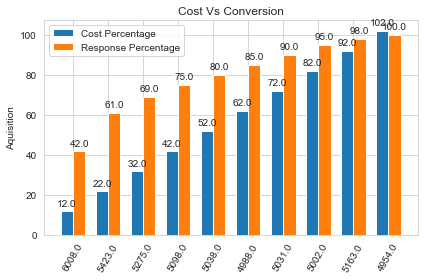

In [510]:
x=np.arange(len(lift_df_final))
width=0.35
labels=lift_df_final.cost
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lift_df_final['cost_percumsum'], width, label='Cost Percentage')
rects2 = ax.bar(x + width/2, lift_df_final['conv_percumsum'], width, label='Response Percentage')
ax.set_ylabel('Aquisition')
ax.set_title('Cost Vs Conversion')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=60)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()